### 간단한 분류 모델 만들기

In [1]:
# conda install -c conda-forge scikit-learn -> 터미널 창에서 실행

In [2]:
import sklearn
sklearn.__version__

'1.5.1'

In [3]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [5]:
dir(mnist)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
len(mnist.target)

1797

In [8]:
len(mnist.data)

1797

In [9]:
mnist.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
mnist.data[0].shape

(64,)

In [12]:
mnist.DESCR # 설명

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 1797\n:Number of Attributes: 64\n:Attribute Information: 8x8 image of integer pixels in the range 0..16.\n:Missing Attribute Values: None\n:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n:Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each bl

In [13]:
mnist.images[0].shape

(8, 8)

In [14]:
image_1 = mnist.images[0]

In [16]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 11.7 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 14.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.7 MB/s eta 0:00:00


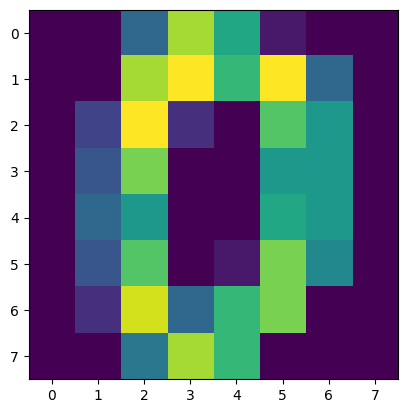

In [17]:
import matplotlib.pyplot as plt

plt.imshow(image_1)

In [18]:
type(image_1)

numpy.ndarray

In [19]:
type(mnist.target)

numpy.ndarray

In [321]:
'''
1. 숫자 데이터를 torch dataset에 입력
2. torch dataloader 만들기
3. 모델링 (nn.Linear)
4. 모델의 학습 루프
    - Optimizer: SGD
    - learning rate : 0.001
    - epochs : 15
    - loss: CrossEntropyLoss
    - batch_size : 알아서
5. 모델 학습 함수
    - 배치 단위 꺼내기
    - 순전파
    - 손실 계산
    - 역전파
'''

'\n1. 숫자 데이터를 torch dataset에 입력\n2. torch dataloader 만들기\n3. 모델링 (nn.Linear)\n4. 모델의 학습 루프\n    - Optimizer: SGD\n    - learning rate : 0.001\n    - epochs : 15\n    - loss: CrossEntropyLoss\n    - batch_size : 알아서\n5. 모델 학습 함수\n    - 배치 단위 꺼내기\n    - 순전파\n    - 손실 계산\n    - 역전파\n'

In [322]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import TensorDataset, Dataset, DataLoader

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.images, mnist.target)

In [324]:
# Dataset 상속
class CustomDataset(Dataset): 
  def __init__(self):
    self.X_train = torch.FloatTensor(mnist.images)
    self.y_train = torch.LongTensor(mnist.target)

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.X_train)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴 (이중 리스트 처리 위해)
  def __getitem__(self, idx): 
    x = self.X_train[idx]
    y = self.y_train[idx]
    return x, y

In [325]:
dataset = CustomDataset()

In [326]:
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [327]:
for i, data in enumerate(dataloader):
    print(i, data)

0 [tensor([[[ 0.,  0.,  6.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  9.,  ...,  5.,  0.,  0.],
         [ 0.,  0.,  8.,  ...,  4.,  0.,  0.],
         ...,
         [ 0.,  0., 10.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  9.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  4.,  ...,  3.,  0.,  0.]],

        [[ 0.,  0.,  5.,  ...,  3.,  0.,  0.],
         [ 0.,  0.,  9.,  ...,  0.,  0.,  0.],
         [ 0.,  0., 12.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ..., 12.,  0.,  0.],
         [ 0.,  0.,  5.,  ...,  8.,  0.,  0.],
         [ 0.,  0.,  3.,  ...,  1.,  0.,  0.]],

        [[ 0.,  0.,  0.,  ...,  7.,  0.,  0.],
         [ 0.,  0.,  2.,  ..., 14.,  2.,  0.],
         [ 0.,  0.,  0.,  ..., 16.,  0.,  0.],
         ...,
         [ 0.,  1., 15.,  ..., 12.,  0.,  0.],
         [ 0.,  1., 13.,  ...,  9.,  0.,  0.],
         [ 0.,  0.,  1.,  ...,  6.,  0.,  0.]],

        ...,

        [[ 0.,  0., 10.,  ...,  0.,  0.,  0.],
         [ 0.,  7., 16.,  ...,  0.,  0.,  

In [328]:
# Subclass 모델

class SimpleNNModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self): #
        super(SimpleNNModel, self).__init__()
        self.linear1 = nn.Linear(64, 32)
        self.linear2 = nn.Linear(32, 10)
        self.relu = nn.ReLU()
        # self.softmax = nn.LogSoftmax(1)


    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        # x = self.softmax(x)
        return x
    
model = SimpleNNModel()

In [329]:
# 강사님
'''
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_func = nn.CrossEntropyLoss()

for epoch in range(10):
    optimizer.zero_grad()
    output = model(mnist.data)
    loss = loss_func(output, mnist.target)
    loss.backward()
    optimizer.step()
'''

'\noptimizer = optim.Adam(model.parameters(), lr=0.01)\nloss_func = nn.CrossEntropyLoss()\n\nfor epoch in range(10):\n    optimizer.zero_grad()\n    output = model(mnist.data)\n    loss = loss_func(output, mnist.target)\n    loss.backward()\n    optimizer.step()\n'

In [330]:
optimizer = optim.SGD(model.parameters(), lr = 1e-4)
loss_func = nn.CrossEntropyLoss()

epochs = 20
for epoch in range(epochs):
    for idx, batch in enumerate(dataloader):
        x, y_true = batch
        y_pred = model(x)
        loss = loss_func(y_pred, y_true)

        # 역전파
        if idx == 0: # epoch 마다 작동
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, loss.item()
        ))

Epoch    0/20 Cost: 2.855093
Epoch    1/20 Cost: 3.981251
Epoch    2/20 Cost: 2.329587
Epoch    3/20 Cost: 4.157135
Epoch    4/20 Cost: 4.666924
Epoch    5/20 Cost: 5.889233
Epoch    6/20 Cost: 4.347003
Epoch    7/20 Cost: 3.302394


Epoch    8/20 Cost: 3.248259
Epoch    9/20 Cost: 4.734452
Epoch   10/20 Cost: 6.128970
Epoch   11/20 Cost: 2.856078
Epoch   12/20 Cost: 4.251591
Epoch   13/20 Cost: 4.496626
Epoch   14/20 Cost: 2.990440
Epoch   15/20 Cost: 2.500170
Epoch   16/20 Cost: 2.249970
Epoch   17/20 Cost: 5.119963
Epoch   18/20 Cost: 3.179846
Epoch   19/20 Cost: 3.260318


### 강사님 코드

In [372]:
'''
분류
- 학습 / 테스트 분류 : train-test-split
- 성능 평가 지표 : 정확도, precision, recall, f1 score
- 틀린 답안이 왜 틀렸는지 시각화
'''

'\n분류\n- 학습 / 테스트 분류 : train-test-split\n- 성능 평가 지표 : 정확도, precision, recall, f1 score\n- 틀린 답안이 왜 틀렸는지 시각화\n'

In [397]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_digits

mnist = load_digits()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=42, stratify=mnist.target)
#


class CustomDataset(torch.utils.data.Dataset): 
  def __init__(self, x, y):
    self.x = torch.FloatTensor(x)
    self.y = torch.LongTensor(y)

  # 총 데이터의 개수를 리턴
  def __len__(self): 
    return len(self.y)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴 (이중 리스트 처리 위해)
  def __getitem__(self, idx): 
    return self.x[idx], self.y[idx]
  
train_ds = CustomDataset(X_train, y_train)
test_ds = CustomDataset(X_test, y_test)

print(train_ds.__len__())
print(test_ds.__len__())
print(train_ds.__getitem__(0))
print(test_ds.__getitem__(0))

# dataset = CustomDataset(mnist.data, mnist.target)

1257
540
(tensor([ 0.,  0.,  0., 16., 12.,  1.,  0.,  0.,  0.,  0.,  6., 16., 14.,  7.,
         0.,  0.,  0.,  0., 14., 15.,  1., 11.,  0.,  0.,  0.,  0., 16., 15.,
         0., 14.,  1.,  0.,  0.,  1., 16., 10.,  0., 14.,  2.,  0.,  0.,  0.,
        15., 13.,  3., 15.,  3.,  0.,  0.,  0.,  9., 16., 16., 15.,  0.,  0.,
         0.,  0.,  0., 13., 16.,  8.,  0.,  0.]), tensor(0))
(tensor([ 0.,  0., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  0.,  0.,
         0.,  0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16.,
        11.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 16.,  2.,  0.,  0.,  0.,  0.,
         0.,  2., 14.,  6.,  0.,  0.,  0.,  0.,  6., 10., 15., 13.,  8.,  3.,
         0.,  0.,  8., 16., 16., 16., 16., 12.]), tensor(1))


In [398]:
dataset.__len__()

1797

In [399]:
dataset.__getitem__(0)

(tensor([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10., 15.,
          5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4., 12.,  0.,
          0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.,  0.,  4.,
         11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5., 10., 12.,  0.,  0.,
          0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 tensor(0))

In [400]:
train_dataloader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_ds, batch_size=32, shuffle=False)

In [401]:
class customModel(nn.Module):
    def __init__(self):
        super(customModel, self).__init__()
        self.linear1 = nn.Linear(64, 32)
        self.linear2 = nn.Linear(32, 10)
        self.relu = nn.ReLU()
        # self.softmax = nn.Softmax(1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        # x = self.softmax(x)
        return x
    
model = customModel()
print(model)

customModel(
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
  (relu): ReLU()
)


In [406]:
from sklearn.metrics import accuracy_score

In [408]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()
epochs = 10

def train_validate(model, train_dataloader, test_dataloader, optimizer, loss_func, epochs):
    train_losses = []
    train_acc = []
    validatrion_losses = []
    # 배치에서 데이터 꺼내기
    for epoch in range(epochs):
        for data, target in train_dataloader:
            # 순전파
            y_pred = model(data)
            # 손실 계산
            loss = loss_func(y_pred, target)
            acc = accuracy_score(target, y_pred.argmax)
            # Gradient 계산
            optimizer.zero_grad()
            # 역전파
            loss.backward()
            optimizer.step()

        print(f"Epoch: {epoch}, Train Loss: {loss.item()}, Train Acc: {acc}")
        train_losses.append(loss.item())

        for data, target in test_dataloader:
            # 순전파
            y_pred = model(data)
            # 손실 계산
            loss = loss_func(y_pred, target)
        print(f"validatrion_losses: {loss.item()}")
        validatrion_losses.append(loss.item())
    return train_losses, validatrion_losses

In [403]:
train(model, train_dataloader, optimizer, criterion, epochs)

Epoch: 0, :oss: 1.3828843832015991
Epoch: 1, :oss: 0.7153725624084473
Epoch: 2, :oss: 0.46548140048980713


Epoch: 3, :oss: 0.5356590747833252
Epoch: 4, :oss: 0.2792741060256958
Epoch: 5, :oss: 0.4234560430049896
Epoch: 6, :oss: 0.27259179949760437
Epoch: 7, :oss: 0.38518789410591125
Epoch: 8, :oss: 0.08229336142539978
Epoch: 9, :oss: 0.18174780905246735


[1.3828843832015991,
 0.7153725624084473,
 0.46548140048980713,
 0.5356590747833252,
 0.2792741060256958,
 0.4234560430049896,
 0.27259179949760437,
 0.38518789410591125,
 0.08229336142539978,
 0.18174780905246735]

In [404]:
def evaluate(model, dataloader, loss_func, epochs):
    losses = []
    # 배치에서 데이터 꺼내기
    for epoch in range(epochs):
        for data, target in dataloader:
            # 순전파
            y_pred = model(data)
            # 손실 계산
            loss = loss_func(y_pred, target)

        print(f"Epoch: {epoch}, :oss: {loss.item()}")
        losses.append(loss.item())
    return losses

In [405]:
evaluate(model, test_dataloader, criterion, epochs)
# 파라미터를 뺐으니까 더 이상 학습이 되면 안 된다. 그래서 값이 동일한 것이 정상.

Epoch: 0, :oss: 0.2531467378139496
Epoch: 1, :oss: 0.2531467378139496
Epoch: 2, :oss: 0.2531467378139496
Epoch: 3, :oss: 0.2531467378139496
Epoch: 4, :oss: 0.2531467378139496
Epoch: 5, :oss: 0.2531467378139496
Epoch: 6, :oss: 0.2531467378139496
Epoch: 7, :oss: 0.2531467378139496
Epoch: 8, :oss: 0.2531467378139496
Epoch: 9, :oss: 0.2531467378139496


[0.2531467378139496,
 0.2531467378139496,
 0.2531467378139496,
 0.2531467378139496,
 0.2531467378139496,
 0.2531467378139496,
 0.2531467378139496,
 0.2531467378139496,
 0.2531467378139496,
 0.2531467378139496]